In [1]:
# import packages
import geopandas as gpd
import mapclassify
import matplotlib
import matplotlib.pyplot as plt
import contextily as cx
import pandas as pd
from matplotlib_scalebar.scalebar import ScaleBar

In [2]:
# import data
access_score = gpd.read_parquet('./results/access_scores.parquet')
sa = gpd.read_parquet('./data/study_area.parquet')
hexagons = gpd.read_parquet('./data/hexagons.parquet')

In [3]:
# clip results to study area
access_score = access_score.to_crs(27700).clip(sa.to_crs(27700))

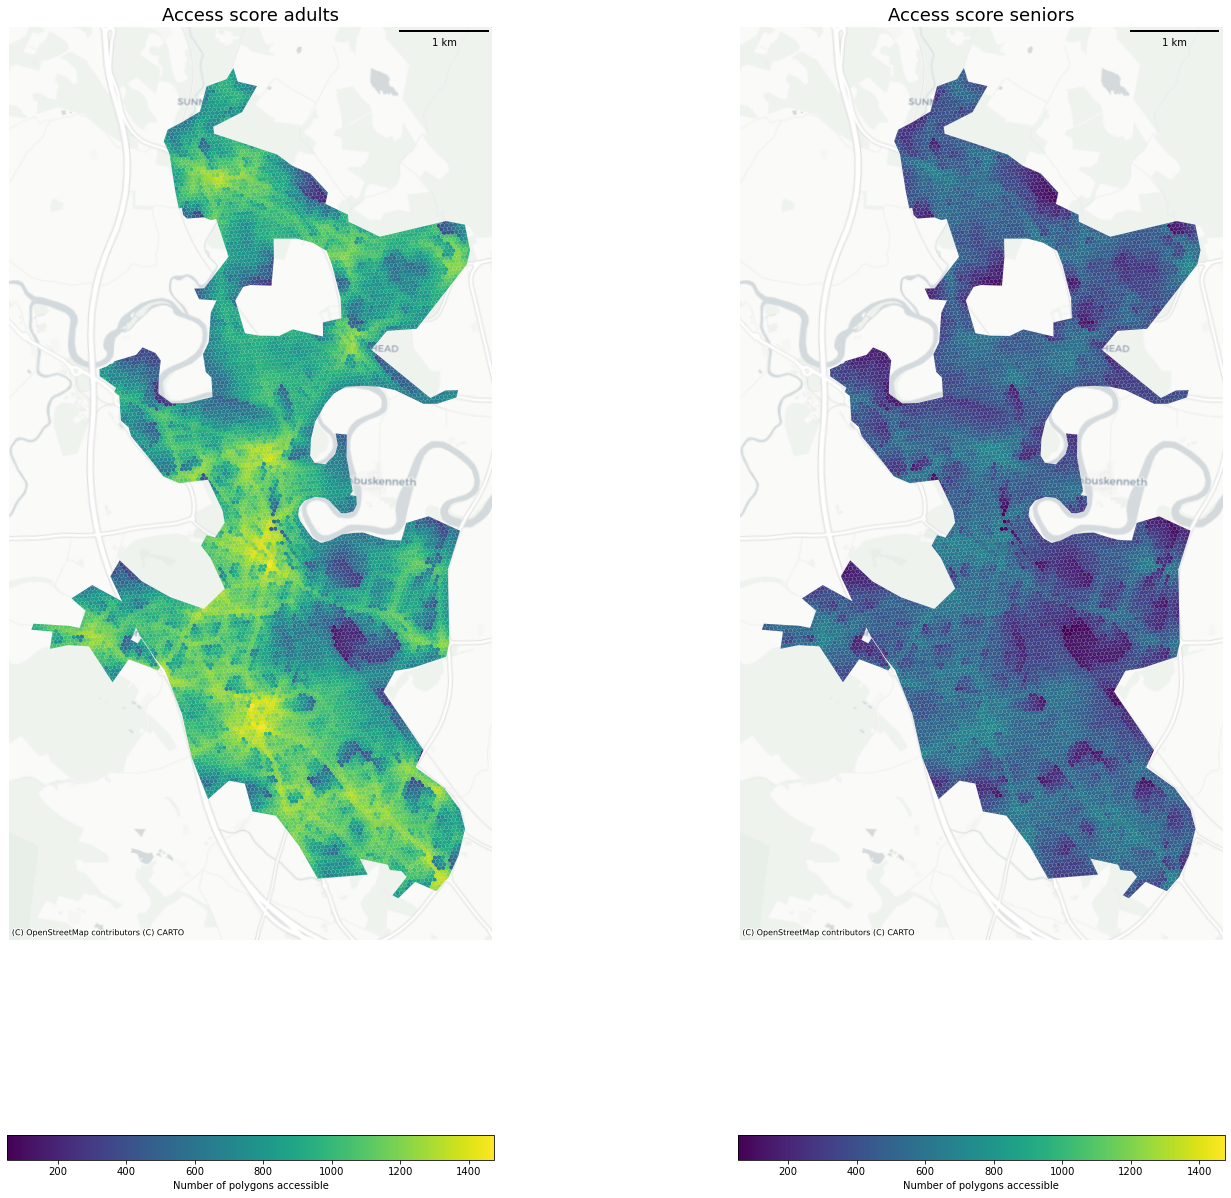

In [11]:
# select variables to plot
vars = ['n_adults','n_seniors']

# set up plot structure
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(24,24))
norm = matplotlib.colors.Normalize(vmin=access_score.n_seniors.min(), vmax=access_score.n_adults.max())

# loop through variables to generate maps
for i, v in enumerate(vars):
    access_score.to_crs(27700).plot(
        v,
        figsize = (12,12),
        ax = axes[i],
        norm = norm,
        legend = True,
        legend_kwds = {'shrink': 0.8, 'orientation':'horizontal', 'label':'Number of polygons accessible'},
        alpha = 1
        
    )
    # context map
    cx.add_basemap(axes[i],
            crs=27700,
            source = cx.providers.CartoDB.Positron)



# add titles 
axes[0].set_title('Access score adults', fontsize = 18)
axes[1].set_title('Access score seniors', fontsize = 18)

# turn off axes
axes[0].set_axis_off()
axes[1].set_axis_off()

# scale bar
axes[0].add_artist(ScaleBar(1, box_alpha=0.0, height_fraction=0.003))
axes[1].add_artist(ScaleBar(1, box_alpha=0.0, height_fraction=0.003))

plt.show()